In [ ]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.metrics import classification_report
import shap
import numpy as np

In [2]:
shap.initjs()

In [4]:
df = pd.read_csv('dataset_janelas_5_seg.csv')

In [5]:
df.head()

patient  num_janela  RR_media  RS_media  QR_media  \
0  MUSE_20180111_155633_99000           1  0.014781  0.044256  0.042571   
1  MUSE_20180111_155633_99000           2  0.018165  0.034188  0.036119   
2  MUSE_20180111_160708_00000           1  0.007057  0.037137  0.032032   
3  MUSE_20180111_160708_00000           2  0.009010  0.030817  0.028024   
4  MUSE_20180111_163105_37000           1  0.004364  0.013108  0.011417   

   R_media_amplitude  Q_media_amplitude  classes  
0           0.151099           0.113279        1  
1           0.136143           0.072974        1  
2           0.697362           0.296293        1  
3           0.167592           0.175770        1  
4           0.002440           0.005619        1

In [24]:
X = df.drop(columns=['patient', 'num_janela', 'classes', 'QR_media','Q_media_amplitude'])

In [41]:
y = df['classes'].values

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3)

In [43]:
bst = XGBClassifier(n_estimators=2, max_depth=2, learning_rate=1, objective='binary:logistic')
bst.fit(X_train, y_train)
preds = bst.predict(X_test)

In [44]:
print(classification_report(preds, y_test))

              precision    recall  f1-score   support

           0       0.77      0.63      0.69       204
           1       0.54      0.69      0.61       127

    accuracy                           0.66       331
   macro avg       0.65      0.66      0.65       331
weighted avg       0.68      0.66      0.66       331



In [45]:
df

patient  num_janela  RR_media  RS_media  QR_media  \
0     MUSE_20180111_155633_99000           1  0.014781  0.044256  0.042571   
1     MUSE_20180111_155633_99000           2  0.018165  0.034188  0.036119   
2     MUSE_20180111_160708_00000           1  0.007057  0.037137  0.032032   
3     MUSE_20180111_160708_00000           2  0.009010  0.030817  0.028024   
4     MUSE_20180111_163105_37000           1  0.004364  0.013108  0.011417   
...                          ...         ...       ...       ...       ...   
1097  MUSE_20180209_121720_14000           2  0.010351  0.021665  0.023334   
1098  MUSE_20180210_130745_19000           1  0.019214  0.059916  0.054217   
1099  MUSE_20180210_130745_19000           2  0.019663  0.053908  0.060398   
1100  MUSE_20180209_174546_56000           1  0.014581  0.033744  0.029904   
1101  MUSE_20180209_174546_56000           2  0.014990  0.047959  0.045336   

      R_media_amplitude  Q_media_amplitude  classes  
0              0.151099           0.113279        1  
1              0.136143           0.072974        1  
2              0.697362           0.296293        1  
3              0.167592           0.175770        1  
4              0.002440           0.005619        1  
...                 ...                ...      ...  
1097           0.118514           0.025213        0  
1098           0.036832           0.052518        0  
1099           0.124556           0.239120        0  
1100           0.116002           0.086823        0  
1101           0.288733           0.251930        0  

[1102 rows x 8 columns]

In [46]:
np.mean(df[df['classes']==1]['RR_media'].values) > np.mean(df[df['classes']==0]['RR_media'].values)

True

In [47]:
np.mean(df[df['classes']==0]['RR_media'].values)

0.009931460989789765

In [48]:
df['classes'].value_counts()

1    566
0    536
Name: classes, dtype: int64

In [49]:
bst.feature_importances_

array([0.131389  , 0.6485549 , 0.22005606], dtype=float32)

In [50]:
X.columns

Index(['RR_media', 'RS_media', 'R_media_amplitude'], dtype='object')

<BarContainer object of 3 artists>

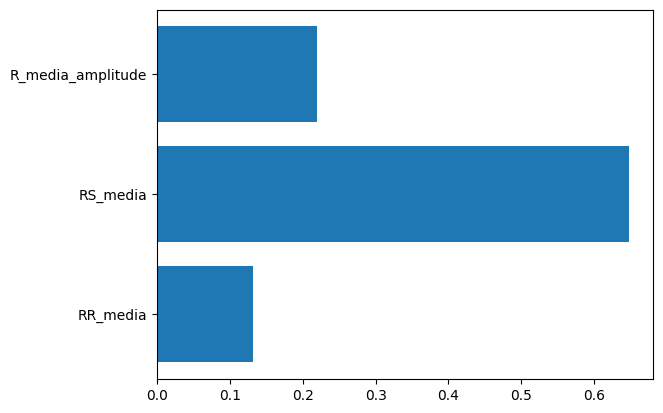

In [51]:
plt.barh(X.columns, bst.feature_importances_)

In [36]:
explainer = shap.Explainer(bst)
shap_values = explainer(X)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


In [37]:
print('Classe: ', y[1098])
shap.plots.force(shap_values[1098])

Classe:  0


In [38]:
print('Classe: ', y[1097])
shap.plots.force(shap_values[1097])

Classe:  0


In [39]:
print('Classe: ', y[55])
shap.plots.force(shap_values[55])

Classe:  1


In [40]:
shap.plots.force(shap_values)